This notebook visualizes the top busiest stations and recommended stations

In [1]:
# common modules
import pandas as pd

# plot modules
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
df_top_stations = pd.read_pickle('top_100_stations.pkl')
df_top_stations = df_top_stations.rename(columns = {'DAILY_TRAFFIC' : 'TRAFFIC'})
df_top_stations.head()

,STATION,TRAFFIC
61,34 ST-PENN STA,81031625.0
233,GRD CNTRL-42 ST,74387325.0
59,34 ST-HERALD SQ,58803013.0
353,TIMES SQ-42 ST,49815477.0
46,23 ST,49153788.0


In [3]:
df_top_stations.columns

Index(['STATION', 'TRAFFIC'], dtype='object')

### Top 100 busiest stations

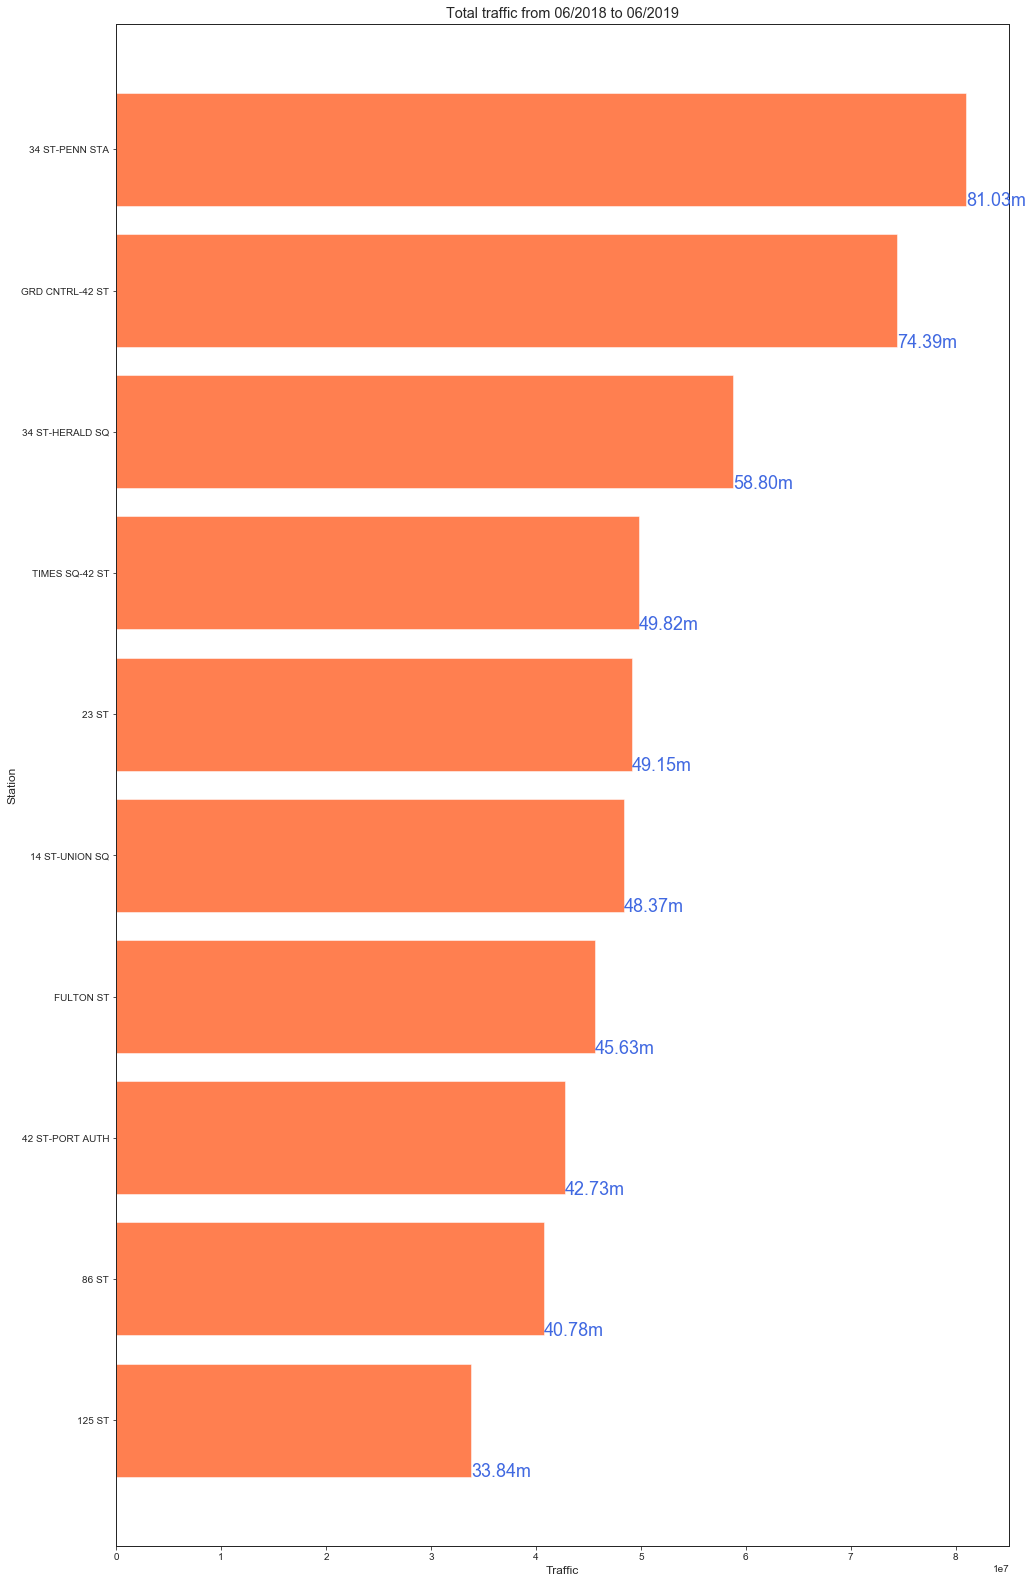

In [21]:
fig, ax = plt.subplots(figsize=(16, 28))
ax.barh(df_top_stations.STATION[:10], df_top_stations.TRAFFIC[:10], align='center', color='coral', ecolor='black')

# add some text for labels, title and axes ticks
ax.set_yticks(df_top_stations.STATION[:10])
#ax.set_yticklabels(plot_daily_count.DATE)
#ax.set_ylim((-1, plot_daily_count.shape[0]))
ax.invert_yaxis()
ax.set_xlabel('Traffic')
ax.set_ylabel('Station')
ax.set_title('Total traffic from 06/2018 to 06/2019')

# add value label for each bar
for i in ax.patches:
    ax.text(i.get_width()+.8, i.get_y()+.8,'{0:.2f}m'.format(i.get_width()/1000000) , \
            fontsize=18,color='#4169E1')
    

https://www.w3schools.com/cssref/css_colors.asp

### Top 10 busiest stations

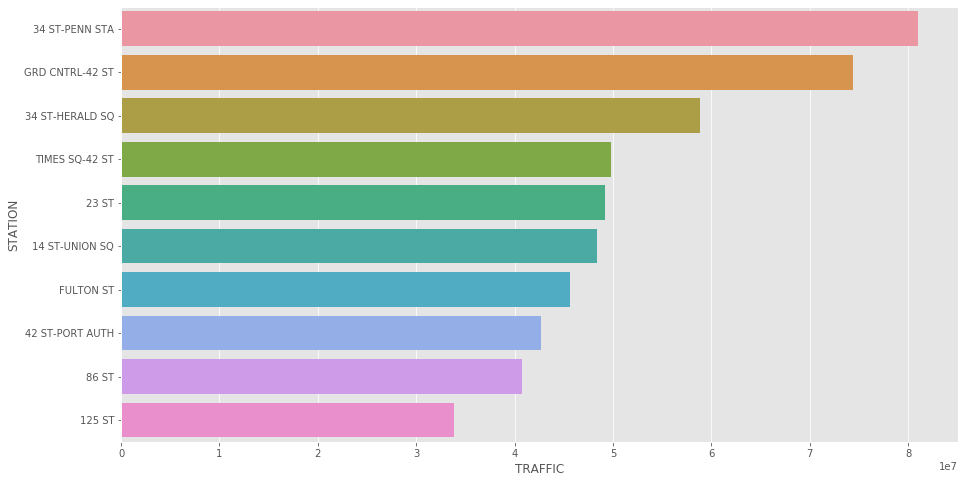

In [5]:
plt.figure(figsize=(15,8))
sns.barplot(x= 'TRAFFIC', y='STATION', data=df_top_stations[:10])

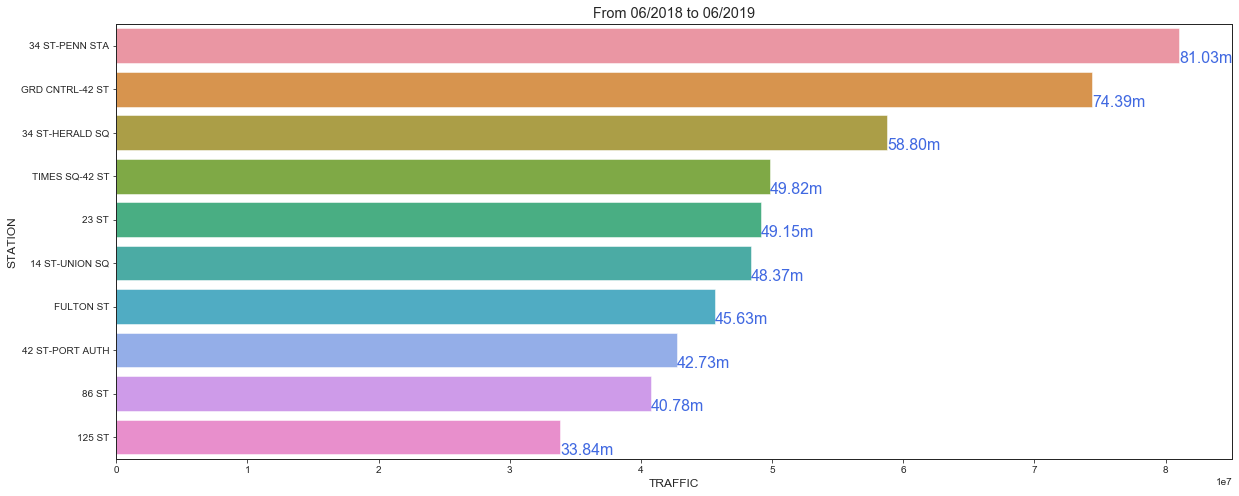

In [6]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 8)
sns.barplot(x= 'TRAFFIC', y='STATION', data=df_top_stations[:10])

ax.set_title('From 06/2018 to 06/2019')
# add value label for each bar
for i in ax.patches:
    ax.text(i.get_width()+.8, i.get_y()+.8,'{0:.2f}m'.format(i.get_width()/1000000) , \
            fontsize=16,color='#4169E1')
    
fig.savefig('yearly_traffic.png')

In [7]:
df_recommended = pd.read_csv('top_10_recommended.csv')
df_recommended

,Unnamed: 0,STATION,SCORE,zip_code,TRAFFIC_RANK,PUBLIC_TRANS_RANK,200K_RANK
0,4,23 ST,67.4,10011.0,77,44,62
1,8,86 ST,66.8,10028.0,73,55,60
2,10,59 ST COLUMBUS,65.4,10023.0,71,50,64
3,5,14 ST-UNION SQ,63.4,10003.0,76,35,54
4,14,96 ST,62.0,10025.0,68,66,40
5,9,125 ST,61.2,10027.0,72,62,28
6,0,34 ST-PENN STA,60.4,10001.0,81,16,43
7,15,PATH NEW WTC,60.4,10007.0,67,22,79
8,11,CANAL ST,59.8,10013.0,70,20,69
9,2,34 ST-HERALD SQ,59.2,10001.0,79,16,43


### Plot the total hourly traffic for our top 10 recommeded stations

In [8]:
df_hourly = pd.read_pickle('hourly_ridership.pkl')
df_hourly.head()

,STATION,TIME_RANGE,HOURLY_TRAFFIC
0,1 AV,0-4,0.0
1,1 AV,12-16,9960.0
2,1 AV,16-20,0.0
3,1 AV,20-24,0.0
4,1 AV,4-8,5177.0


/Users/ducvu/anaconda3/envs/metis/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


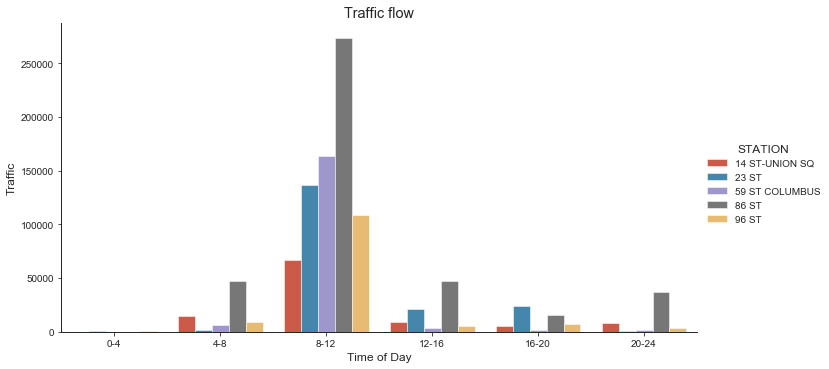

In [9]:
top_station_by_hour = df_hourly[df_hourly['STATION'].isin(df_recommended['STATION'][:5])]

order = ['0-4', '4-8', '8-12', '12-16', '16-20', '20-24']

hourly_bar = sns.factorplot('TIME_RANGE', 'HOURLY_TRAFFIC', hue ='STATION', kind = 'bar', \
                          data = top_station_by_hour, aspect = 2, order=order)
#plt.xticks(rotation=45)
plt.xlabel('Time of Day')
plt.ylabel('Traffic')
plt.title("Traffic flow")

hourly_bar.savefig('hourly_traffic.png')

### Plot the total weekly traffic for our top 10 recommeded stations

In [10]:
df_dailly = pd.read_pickle('daily_ridership.pkl')
df_dailly.head()

,STATION,DATE,DAILY_TRAFFIC,WEEKDAY,WEEK
2,1 AV,2018-06-25,0.0,Monday,26
3,1 AV,2018-06-26,0.0,Tuesday,26
4,1 AV,2018-06-27,0.0,Wednesday,26
5,1 AV,2018-06-28,0.0,Thursday,26
6,1 AV,2018-06-29,0.0,Friday,26


/Users/ducvu/anaconda3/envs/metis/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


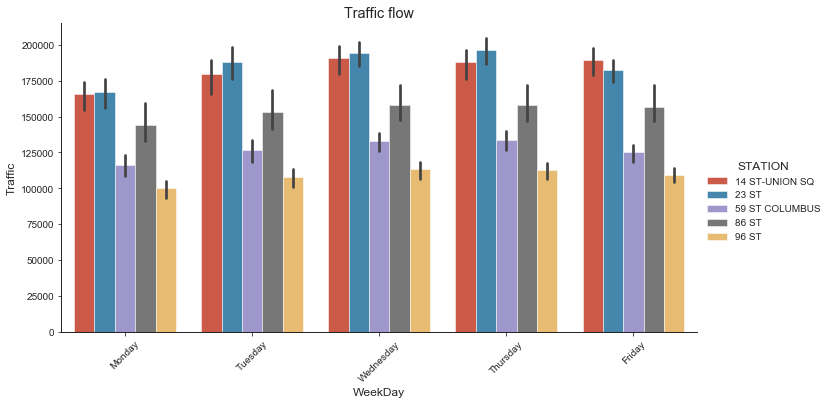

In [14]:
df_dailly = pd.read_pickle('daily_ridership.pkl')


top_station_by_day = df_dailly[df_dailly['STATION'].isin(df_recommended['STATION'][:5])]

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

daily_bar = sns.factorplot('WEEKDAY', 'DAILY_TRAFFIC', hue ='STATION', kind = 'bar', \
                          data = top_station_by_day, aspect = 2, order=order)
plt.xticks(rotation=45)
plt.xlabel('WeekDay')
plt.ylabel('Traffic')
plt.title("Traffic flow")

daily_bar.savefig('daily_traffic.png')